In [399]:
import json
import os
import re
from collections import defaultdict

import pandas as pd


In [400]:
def sort_dict_by_key(dictionary):
    sorted_dict = dict(
        sorted(dictionary.items(), key=lambda x: [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', x[0])]))
    return sorted_dict

In [401]:
results = defaultdict(lambda: defaultdict(list))
results_path = "../Results-MLPwAttention/"
for file in os.listdir(results_path):
    prefix = "probresult"
    if file[:len(prefix)] == prefix and file[-5:] == ".json":
        print(os.path.join(results_path, file))
        with open(os.path.join(results_path, file)) as f:
            result = json.load(f)
            result["file_name"] = file
            result["file_path"] = f.name
            results[(result["prob_model_variant"] if "prob_model_variant" in result else "") + result["X"]][
                result["Y"]].append(result)


../Results-MLPwAttention/probresult_XY_bool_CoEnv_X_TANL_layer_5_t5-base_epoch20_muc1700_epoch56_nhid800.json
../Results-MLPwAttention/probresult_XY_5way_rolelabeling_X_TANL_layer_12_t5-base_epoch5_muc1700_epoch56_nhid400.json
../Results-MLPwAttention/probresult_XY_6way_typing_X_TANL_layer_4_t5-base_epoch20_muc1700_epoch60_nhid400.json
../Results-MLPwAttention/probresult_Y_bucket_num_events_muc1700_X_TANL_layer_7_t5-base_epoch20_muc1700_epoch48_nhid200.json
../Results-MLPwAttention/probresult_XY_bool_isArg_X_dygie_sent_epoch5_epoch60_nhid400.json
../Results-MLPwAttention/probresult_XY_6way_typing_X_TANL_layer_0_t5-base_epoch20_muc1700_epoch64_nhid400.json
../Results-MLPwAttention/probresult_Y_bucket_num_words_muc1700_X_raw_layer_6_bert-uncased_epoch56_nhid200.json
../Results-MLPwAttention/probresult_Y_bucket_num_sent_muc1700_X_dygie_sent_epoch15_epoch60_nhid400.json
../Results-MLPwAttention/probresult_XY_bool_CoEnv_X_TANL_layer_12_t5-base_epoch20_muc1700_epoch60_nhid800.json
../Results

In [402]:
[(k, results[k].keys()) for k in results.keys()]

[('X_TANL_layer_5_t5-base_epoch20_muc1700',
  dict_keys(['XY_bool_CoEnv', 'XY_bool_coref', 'Y_bucket_num_sent_muc1700', 'XY_bool_isArg', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700', 'XY_6way_typing', 'XY_5way_rolelabeling'])),
 ('X_TANL_layer_12_t5-base_epoch5_muc1700',
  dict_keys(['XY_5way_rolelabeling', 'XY_bool_CoEnv', 'Y_bucket_num_sent_muc1700', 'XY_bool_isArg', 'Y_bucket_num_events_muc1700', 'XY_bool_coref', 'XY_6way_typing', 'Y_bucket_num_words_muc1700'])),
 ('X_TANL_layer_4_t5-base_epoch20_muc1700',
  dict_keys(['XY_6way_typing', 'Y_bucket_num_sent_muc1700', 'XY_bool_CoEnv', 'Y_bucket_num_words_muc1700', 'XY_bool_coref', 'XY_5way_rolelabeling', 'Y_bucket_num_events_muc1700', 'XY_bool_isArg'])),
 ('X_TANL_layer_7_t5-base_epoch20_muc1700',
  dict_keys(['Y_bucket_num_events_muc1700', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_sent_muc1700', 'XY_6way_typing', 'XY_bool_isArg', 'XY_5way_rolelabeling', 'XY_bool_coref', 'XY_bool_CoEnv'])),
 ('X_dygie_sent_epoch5',
  d

In [497]:
display_dict = {}  # Create an empty dictionary to store the final result

for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        #sorted_values = sorted([(d['hidden_size'],d['val_acc'] ) for d in list_of_results], key=lambda p: p[0])
        sorted_values = sorted([(d['hidden_size'],len([1 for i in range(len(d['val_pred'])) if d['val_pred'][i].index(max(d['val_pred'][i]))==d['val_true'][i].index(max(d['val_true'][i]))])/len(d['val_true']) ) for d in list_of_results], key=lambda p: p[0])
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        inner_dict[task_name] = [p[1] for p in sorted_values]
        inner_dict[task_name] = [str(p) + ("*" if p == max(inner_dict[task_name]) else "") for p in
                                 inner_dict[task_name]]
    # Remove the last 29 characters in column names ("_bert-uncased_epoch20_muc1700")
    display_dict[embedding_layer_name[:]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
df_aligned = df.applymap(lambda l: l)  #[x.ljust(6) for x in l])

df_aligned.columns.name = "val acc of hidden size\n [100, 200, 400, 800]\nbert-uncased, muc1700\n * = best performance in cell"

In [498]:
df_aligned

"val acc of hidden size [100, 200, 400, 800] bert-uncased, muc1700 * = best performance in cell",XY_bool_coref,XY_bool_CoEnv,XY_bool_isArg,XY_6way_typing,Y_bucket_num_sent_muc1700,XY_5way_rolelabeling,Y_bucket_num_words_muc1700,Y_bucket_num_events_muc1700
X_GTT_Sent_layer_12_bert-uncased_epoch5_muc1700,[0.7027027027027027*],[0.5598006644518272*],[0.8862857142857142*],[0.7509225092250923*],[0.545*],[0.9154929577464789*],[0.51*],[0.72*]
X_GTT_Sent_layer_12_bert-uncased_epoch10_muc1700,[0.6589002795899348*],[0.5705980066445183*],[0.8731428571428571*],[0.7158671586715867*],[0.58*],[0.9044265593561368*],[0.5*],[0.72*]
X_GTT_Sent_layer_12_bert-uncased_epoch15_muc1700,[0.6533084808946877*],[0.574750830564784*],[0.8834285714285715*],[0.7398523985239852*],[0.555*],[0.8983903420523138*],[0.545*],[0.725*]
X_GTT_Sent_layer_12_bert-uncased_epoch20_muc1700,[0.6924510717614166*],[0.5971760797342193*],[0.8782857142857143*],[0.7472324723247232*],[0.565*],[0.9104627766599598*],[0.55*],[0.685*]
X_GTT_layer_0_bert-uncased_epoch18_muc1700,[0.7045666356011183*],[0.5514950166112956*],[0.832*],[0.6143911439114391*],"[0.42*, 0.42*, 0.38, 0.34]",[0.7967806841046278*],"[0.595, 0.6*, 0.585, 0.565]","[0.635*, 0.615, 0.605, 0.62]"
...,...,...,...,...,...,...,...,...
X_raw_layer_8_bert-uncased,[0.6826923076923077*],[0.6150271107668474*],[0.879045996592845*],[0.7155797101449275*],"[0.515*, 0.495, 0.51, 0.495]",[0.903096903096903*],"[0.635, 0.66*, 0.66*, 0.65]","[0.635, 0.64, 0.64, 0.645*]"
X_raw_layer_9_bert-uncased,[0.6809440559440559*],[0.6219984508133231*],[0.8710959681998864*],[0.7155797101449275*],"[0.465*, 0.45, 0.46, 0.46]",[0.9090909090909091*],"[0.645, 0.675*, 0.665, 0.66]","[0.64*, 0.62, 0.62, 0.635]"
X_raw_layer_10_bert-uncased,[0.6512237762237763*],[0.5948876839659178*],[0.881885292447473*],[0.7228260869565217*],"[0.51, 0.535*, 0.53, 0.515]",[0.9080919080919081*],"[0.685*, 0.67, 0.655, 0.67]","[0.655*, 0.64, 0.645, 0.645]"
X_raw_layer_11_bert-uncased,[0.6433566433566433*],[0.5840433772269559*],[0.8858603066439523*],[0.6902173913043478*],"[0.515*, 0.48, 0.495, 0.49]",[0.9100899100899101*],"[0.68*, 0.65, 0.645, 0.655]","[0.65, 0.67, 0.69*, 0.685]"


In [499]:
display_dict = {}  # Create an empty dictionary to store the final result

for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        #sorted_values = sorted([(d['hidden_size'], d['test_acc']) for d in list_of_results], key=lambda p: p[0])
        sorted_values = sorted([(d['hidden_size'],len([1 for i in range(len(d['test_pred'])) if d['test_pred'][i].index(max(d['test_pred'][i]))==d['test_true'][i].index(max(d['test_true'][i]))])/len(d['test_pred']) ) for d in list_of_results], key=lambda p: p[0])
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        inner_dict[task_name] = [p[1] for p in sorted_values]
        inner_dict[task_name] = [str(p) + ("*" if p == max(inner_dict[task_name]) else "") for p in
                                 inner_dict[task_name]]
    # Remove the last 29 characters in column names ("_bert-uncased_epoch**_muc1700")
    display_dict[embedding_layer_name[:]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
df_aligned = df.applymap(lambda l: l)  #[x.ljust(6) for x in l])

df_aligned.columns.name = "Test acc of hidden size\n [100, 200, 400, 800]\nbert-uncased, muc1700\n * = best performance in cell"

In [501]:
selected_nhid=400

In [552]:
display_dict = {}  # Create an empty dictionary to store the final result

for embedding_layer_name, v in results.items():  # Iterate through each key-value pair in the "results" dictionary
    inner_dict = {}  # Create an empty dictionary to store the inner values
    for task_name, list_of_results in v.items():  # Iterate through each key-value pair in the inner dictionary
        # Sort the values based on the 'hidden_size' key and extract the 'val_acc' values
        size_to_test_acc = {d['hidden_size']: d['test_acc'] for d in list_of_results}
        # Extract the 'val_acc' values from the sorted list and assign them to the inner dictionary
        if selected_nhid not in size_to_test_acc:
            print(embedding_layer_name, "not available in ",task_name, f"of hid {selected_nhid}")
        else:
            inner_dict[task_name] = size_to_test_acc[selected_nhid]
    # Remove the last 29 characters in column names ("_bert-uncased_epoch**_muc1700")
    display_dict[embedding_layer_name[:]] = inner_dict

df = pd.DataFrame.from_dict(sort_dict_by_key(display_dict), orient='index')
#df_aligned = df.applymap(lambda l: [x.ljust(6) for x in l])
new_df = df
org_df = df
display_df = df[:]
display_df.columns.name = f"Test acc of hidden size {selected_nhid}\nbert-uncased, muc1700\n "
display_df

"Test acc of hidden size 400 bert-uncased, muc1700",XY_bool_coref,XY_bool_CoEnv,XY_bool_isArg,XY_6way_typing,Y_bucket_num_sent_muc1700,XY_5way_rolelabeling,Y_bucket_num_words_muc1700,Y_bucket_num_events_muc1700
X_GTT_Sent_layer_12_bert-uncased_epoch5_muc1700,0.628803,0.584704,0.894580,0.709208,0.625,0.892977,0.550,0.725
X_GTT_Sent_layer_12_bert-uncased_epoch10_muc1700,0.718053,0.542763,0.901132,0.647819,0.585,0.883779,0.515,0.695
X_GTT_Sent_layer_12_bert-uncased_epoch15_muc1700,0.704530,0.603618,0.895176,0.636511,0.515,0.874582,0.585,0.695
X_GTT_Sent_layer_12_bert-uncased_epoch20_muc1700,0.613928,0.555921,0.885646,0.697900,0.585,0.878763,0.540,0.670
X_GTT_layer_0_bert-uncased_epoch18_muc1700,0.691007,0.583059,0.821918,0.539580,0.390,0.790970,0.585,0.600
...,...,...,...,...,...,...,...,...
X_raw_layer_8_bert-uncased,0.737727,0.555287,0.877600,0.672897,0.440,0.867227,0.695,0.570
X_raw_layer_9_bert-uncased,0.639543,0.564972,0.879382,0.694704,0.480,0.862185,0.695,0.595
X_raw_layer_10_bert-uncased,0.737054,0.587571,0.879976,0.694704,0.440,0.869748,0.655,0.555
X_raw_layer_11_bert-uncased,0.717552,0.576271,0.882353,0.694704,0.460,0.870588,0.715,0.605


In [576]:
import pandas as pd
df.columns.name = ""
# Selecting the desired rows based on conditions
selected_rows = [row for row in df.index if 'layer_12' in row or 'dygie' in row]
selected_rows = [row for row in selected_rows if any(epoch in row for epoch in ['epoch5', 'epoch10', 'epoch15', 'epoch20', "raw"])]
selected_rows = [row for row in selected_rows if any(model in row for model in ['GTT', 'TANL', 'dygie', 'raw'])]
#selected_rows = [row for row in selected_rows if 'Sent' in row]

# Selecting the desired columns (tasks)
selected_columns = ['Y_bucket_num_words_muc1700', 'Y_bucket_num_sent_muc1700',  'XY_bool_isArg', 'XY_5way_rolelabeling',  'XY_bool_coref','XY_6way_typing', 'XY_bool_CoEnv','Y_bucket_num_events_muc1700']

# Creating a new DataFrame with the selected rows and columns
new_df = df.loc[selected_rows, selected_columns]

# Resetting the index or creating a new index
new_df.reset_index(inplace=True)
new_df.rename(columns={'index': 'New_Index'}, inplace=True)
new_df.to_csv('ModelComparison.csv', index=True)
new_df

,New_Index,Y_bucket_num_words_muc1700,Y_bucket_num_sent_muc1700,XY_bool_isArg,XY_5way_rolelabeling,XY_bool_coref,XY_6way_typing,XY_bool_CoEnv,Y_bucket_num_events_muc1700
0,X_GTT_Sent_layer_12_bert-uncased_epoch5_muc1700,0.550,0.625,0.894580,0.892977,0.628803,0.709208,0.584704,0.725
1,X_GTT_Sent_layer_12_bert-uncased_epoch10_muc1700,0.515,0.585,0.901132,0.883779,0.718053,0.647819,0.542763,0.695
2,X_GTT_Sent_layer_12_bert-uncased_epoch15_muc1700,0.585,0.515,0.895176,0.874582,0.704530,0.636511,0.603618,0.695
3,X_GTT_Sent_layer_12_bert-uncased_epoch20_muc1700,0.540,0.585,0.885646,0.878763,0.613928,0.697900,0.555921,0.670
4,X_GTT_layer_12_bert-uncased_epoch5_muc1700,0.520,0.460,0.893985,0.885452,0.737661,0.686591,0.573191,0.680
5,X_GTT_layer_12_bert-uncased_epoch10_muc1700,0.610,0.440,0.899345,0.883779,0.659229,0.620355,0.578947,0.655
6,X_GTT_layer_12_bert-uncased_epoch15_muc1700,0.540,0.545,0.880286,0.883779,0.660581,0.691438,0.623355,0.670
7,X_GTT_layer_12_bert-uncased_epoch20_muc1700,0.565,0.500,0.885051,0.880435,0.667343,0.633279,0.608553,0.685
8,X_TANL_Sent_layer_12_t5-base_epoch5_muc1700,0.365,0.390,0.899461,0.877740,0.631827,0.581994,0.547619,0.660
9,X_TANL_Sent_layer_12_t5-base_epoch10_muc1700,0.330,0.310,0.894674,0.873524,0.650708,0.588424,0.545156,0.660


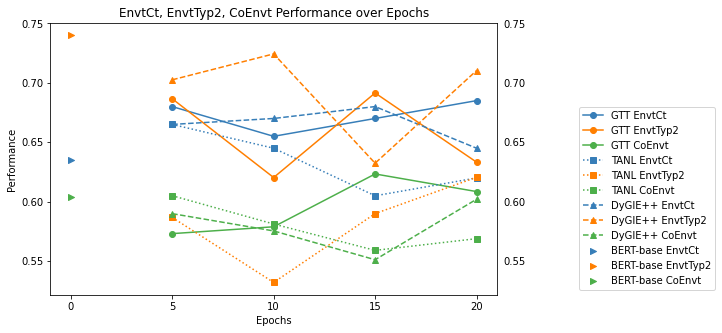

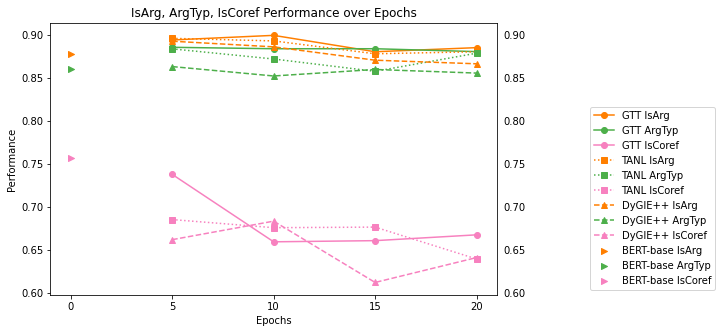

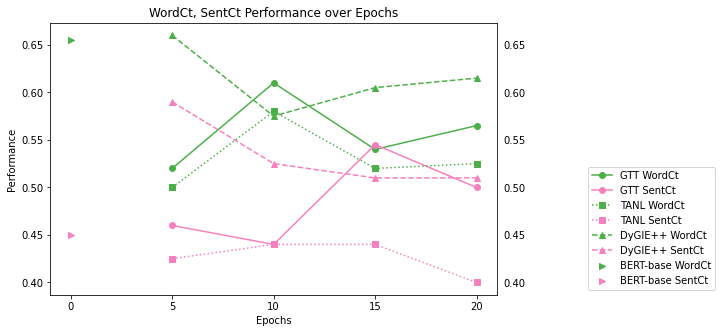

In [665]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load data
df = new_df[:]
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Separate data into models: GTT, TANL, dygie, raw
df_gtt = df[df['New_Index'].str.contains("GTT") & ~df['New_Index'].str.contains("Sent")]
df_tanl = df[df['New_Index'].str.contains("TANL") & ~df['New_Index'].str.contains("Sent")]
df_dygie = df[df['New_Index'].str.contains("dygie") & ~df['New_Index'].str.contains("sent")]
df_raw = df[df['New_Index'].str.contains("raw")]

# Define the sets of variables to plot and their new names
old_vars = [['Y_bucket_num_events_muc1700','XY_6way_typing', 'XY_bool_CoEnv'],
            ['XY_bool_isArg', 'XY_5way_rolelabeling', 'XY_bool_coref'],
            ['Y_bucket_num_words_muc1700', 'Y_bucket_num_sent_muc1700']]

new_vars = [['EnvtCt', 'EnvtTyp2', 'CoEnvt'],
            ['IsArg', 'ArgTyp', 'IsCoref'],
            ['WordCt', 'SentCt']]

line_styles = ['-', ':', '--', "-."]
models = [df_gtt, df_tanl, df_dygie, df_raw]
model_names = ['GTT', 'TANL', 'DyGIE++','BERT-base']
markers = ["o", "s",  "^", ">",]
# Loop over the sets of variables
for i, old_var_set, new_var_set in zip(range(len(old_vars)), old_vars, new_vars):
    plt.figure(figsize=(8, 5))

    for ii,  (model, model_name) in enumerate(zip(models, model_names)):
        for j, (old_var, new_var) in enumerate(zip(old_var_set, new_var_set)):
            # If the model has epoch in the name, create a list of epochs
            if 'epoch' in model['New_Index'].iloc[0]:
                epochs = [int(name.split('epoch')[1].split('_')[0]) for name in model['New_Index']]
            else:  # If it doesn't have epoch, create a list of zeros (for the baseline)
                epochs = [0] * len(model)
            if len(epochs) == 1:
                plt.scatter(epochs, model[old_var], color=colors[j+i], marker = markers[ii],
                     label=f'{model_name} {new_var}')
            else:
                plt.plot(epochs, model[old_var], color=colors[j+i],linestyle=line_styles[ii], marker = markers[ii],
                     label=f'{model_name} {new_var}')

    plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0))
    plt.xlabel('Epochs')
    plt.xticks([0,5,10,15,20])
    #plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
    plt.ylabel('Performance')
    plt.title(', '.join(new_var_set) + ' Performance over Epochs')
    plt.tick_params(axis='y', labelright=True)

    plt.savefig(f'{", ".join(new_var_set)} Right Performance over Epochs.pdf',bbox_inches='tight')

    plt.show()

In [618]:
import pandas as pd
import numpy as np

df = new_df[:]
df = df.applymap(lambda x: 100*x if isinstance(x, float) else x)

df.columns.name = ""
# Function to underline the maximum value in a Series
def underline_max(s):
    is_max = s == s.max()
    return ['\\textbf{' + f'{v:.1f}' + '}' if is_max else f'{v:.1f}' for v, is_max in zip(s, is_max)]

# Function to bold the maximum value in a DataFrame
def bold_max(df):
    is_max = df == df.values.max()
    df = df.astype(str)
    df[is_max] = '\\underline{' + df[is_max] + '}'
    return df

# Extract "Model", "Epoch", and "SentOrNot" from "New_Index"
df['Model'] = df['New_Index'].apply(lambda x: x.split('_')[1])
df['Epoch'] = df['New_Index'].apply(lambda x: int("".join([c for c in x.split('_')[-2] + (x.split('_')[-1] if "muc" not in x.split('_')[-1] else "") if c.isdigit()])) if 'epoch' in x else '')
df['SentOrNot'] = df['New_Index'].apply(lambda x: 'SentCat' if 'sent' in x.lower() else 'FullText')

# Rename the specified columns
df = df.rename(columns={
    'Y_bucket_num_sent_muc1700': 'SentCt',
    'XY_bool_CoEnv': 'CoEnvt',
    'XY_6way_typing': 'EnvtTyp2',
    'XY_5way_rolelabeling': 'ArgTyp',
    'XY_bool_isArg': 'isArg',
    'Y_bucket_num_words_muc1700': 'WordCt',
    'XY_bool_coref': 'isCoref',
    'Y_bucket_num_events_muc1700': 'EnvtCt'
})

# Drop the "New_Index" column
df = df.drop(columns=['New_Index'])

# Set "Model", "Epoch", and "SentOrNot" as index and sort by these indices
df.set_index(["Model", "Epoch", "SentOrNot"], inplace=True)
df.sort_index(inplace=True)

for col in df.columns:
    df[col] = underline_max(df[col])
df = df.astype(str)

df = df.groupby(level='Model').transform(bold_max)




# Convert DataFrame to Latex table
latex_table = df.to_latex(escape=False)  # escape=False to allow LaTeX commands

# Write the latex table into a .tex file
with open('latex_table2.tex', 'w') as f:
    f.write(latex_table)

df


WordCt                     SentCt  \
Model Epoch SentOrNot                                                         
GTT   5     FullText                        52.0                       46.0   
            SentCat                         55.0  \underline{\textbf{62.5}}   
      10    FullText            \underline{61.0}                       44.0   
            SentCat                         51.5                       58.5   
      15    FullText                        54.0                       54.5   
            SentCat                         58.5                       51.5   
      20    FullText                        56.5                       50.0   
            SentCat                         54.0                       58.5   
TANL  5     FullText                        50.0                       42.5   
            SentCat                         36.5                       39.0   
      10    FullText            \underline{58.0}           \underline{44.0}   
            SentCat                         33.0                       31.0   
      15    FullText                        52.0           \underline{44.0}   
            SentCat                         36.0                       41.0   
      20    FullText                        52.5                       40.0   
            SentCat                         37.0                       40.5   
dygie 5     FullText   \underline{\textbf{66.0}}                       59.0   
            SentCat                         62.5                       60.0   
      10    FullText                        57.5                       52.5   
            SentCat                         53.5                       54.0   
      15    FullText                        60.5                       51.0   
            SentCat                         59.5                       60.5   
      20    FullText                        61.5                       51.0   
            SentCat                         56.5           \underline{61.5}   
raw         FullText            \underline{65.5}           \underline{45.0}   

                                           isArg                     ArgTyp  \
Model Epoch SentOrNot                                                         
GTT   5     FullText                        89.4                       88.5   
            SentCat                         89.5  \underline{\textbf{89.3}}   
      10    FullText                        89.9                       88.4   
            SentCat    \underline{\textbf{90.1}}                       88.4   
      15    FullText                        88.0                       88.4   
            SentCat                         89.5                       87.5   
      20    FullText                        88.5                       88.0   
            SentCat                         88.6                       87.9   
TANL  5     FullText                        89.6           \underline{88.4}   
            SentCat             \underline{89.9}                       87.8   
      10    FullText                        89.3                       87.2   
            SentCat                         89.5                       87.4   
      15    FullText                        87.8                       85.8   
            SentCat                         88.2                       87.1   
      20    FullText                        88.0                       87.9   
            SentCat                         88.7                       88.2   
dygie 5     FullText            \underline{89.3}                       86.3   
            SentCat                         88.6           \underline{87.3}   
      10    FullText                        88.6                       85.2   
            SentCat                         88.6                       86.8   
      15    FullText                        87.0                       86.0   
            SentCat                         88.1                       86.3   
      20    

In [619]:
import pandas as pd
import numpy as np

df = new_df[:]
df = df.applymap(lambda x: 100*x if isinstance(x, float) else x)

df.columns.name = ""
# Function to underline the  maximum value in a Series
def underline_max(s):
    is_max = s == s.max()
    return ['\\textbf{' + f'{v:.1f}' + '}' if is_max else f'{v:.1f}' for v, is_max in zip(s, is_max)]

# Function to bold the maximum value in a DataFrame
def bold_max(df):
    is_max = df == df.values.max()
    df = df.astype(str)
    df[is_max] = '\\underline{' + df[is_max] + '}'
    return df

# Extract "Model", "Epoch", and "SentOrNot" from "New_Index"
df['Model'] = df['New_Index'].apply(lambda x: x.split('_')[1])
df['Epoch'] = df['New_Index'].apply(lambda x: int("".join([c for c in x.split('_')[-2] + (x.split('_')[-1] if "muc" not in x.split('_')[-1] else "") if c.isdigit()])) if 'epoch' in x else '')
df['SentOrNot'] = df['New_Index'].apply(lambda x: 'SentCat' if 'sent' in x.lower() else 'FullText')

# Rename the specified columns
df = df.rename(columns={
    'Y_bucket_num_sent_muc1700': 'SentCt',
    'XY_bool_CoEnv': 'CoEnvt',
    'XY_6way_typing': 'EnvtTyp2',
    'XY_5way_rolelabeling': 'ArgTyp',
    'XY_bool_isArg': 'isArg',
    'Y_bucket_num_words_muc1700': 'WordCt',
    'XY_bool_coref': 'isCoref',
    'Y_bucket_num_events_muc1700': 'EnvtCt'
})

# Drop the "New_Index" column
df = df.drop(columns=['New_Index'])

# Set "Model", "Epoch", and "SentOrNot" as index and sort by these indices
df.set_index(["Model", "Epoch", "SentOrNot"], inplace=True)
df.sort_index(inplace=True)

df = df.loc[(df.index.get_level_values('Epoch') == 20) | (df.index.get_level_values('Model') == 'raw')]

# Drop the "Epoch" level from the index
df.reset_index(level='Epoch', drop=True, inplace=True)

for col in df.columns:
    df[col] = underline_max(df[col])
df = df.astype(str)

df = df.groupby(level='SentOrNot').transform(bold_max)

# Convert DataFrame to Latex table
latex_table = df.to_latex(escape=False)

# Write the latex table into a .tex file
with open('latex_table_epoch20.tex', 'w') as f:
    f.write(latex_table)

df


WordCt                     SentCt  \
Model SentOrNot                                                         
GTT   FullText                        56.5                       50.0   
      SentCat                         54.0                       58.5   
TANL  FullText                        52.5                       40.0   
      SentCat                         37.0                       40.5   
dygie FullText                        61.5           \underline{51.0}   
      SentCat             \underline{56.5}  \underline{\textbf{61.5}}   
raw   FullText   \underline{\textbf{65.5}}                       45.0   

                                     isArg                     ArgTyp  \
Model SentOrNot                                                         
GTT   FullText            \underline{88.5}           \underline{88.0}   
      SentCat                         88.6                       87.9   
TANL  FullText                        88.0                       87.9   
      SentCat    \underline{\textbf{88.7}}  \underline{\textbf{88.2}}   
dygie FullText                        86.6                       85.5   
      SentCat                         87.3                       85.9   
raw   FullText                        87.8                       86.1   

                                   isCoref                   EnvtTyp2  \
Model SentOrNot                                                         
GTT   FullText                        66.7                       63.3   
      SentCat                         61.4                       69.8   
TANL  FullText                        63.9                       62.1   
      SentCat                         65.3                       62.4   
dygie FullText                        64.1                       71.0   
      SentCat             \underline{71.1}           \underline{72.1}   
raw   FullText   \underline{\textbf{75.7}}  \underline{\textbf{74.0}}   

                                    CoEnvt                     EnvtCt  
Model SentOrNot                                                        
GTT   FullText   \underline{\textbf{60.9}}           \underline{68.5}  
      SentCat             \underline{55.6}                       67.0  
TANL  FullText                        56.9                       62.0  
      SentCat                         53.6                       66.0  
dygie FullText                        60.2                       64.5  
      SentCat                         53.9  \underline{\textbf{69.0}}  
raw   FullText                        60.4                       63.5

In [647]:
import pandas as pd
df = org_df[:]
# Selecting the desired rows based on conditions
selected_rows = [row for row in df.index if 'layer_' in row]
selected_rows = [row for row in selected_rows if any(epoch in row for epoch in ['epoch18', "raw"])]
selected_rows = [row for row in selected_rows if any(model in row for model in ['GTT', 'TANL', 'dygie', 'raw'])]
#selected_rows = [row for row in selected_rows if 'Sent' in row]

# Selecting the desired columns (tasks)
selected_columns = ['Y_bucket_num_words_muc1700', 'Y_bucket_num_sent_muc1700',  'XY_bool_isArg', 'XY_5way_rolelabeling',  'XY_bool_coref','XY_6way_typing', 'XY_bool_CoEnv','Y_bucket_num_events_muc1700']

# Creating a new DataFrame with the selected rows and columns
df = df.loc[selected_rows, selected_columns]
df = df.rename(columns={
    'Y_bucket_num_sent_muc1700': 'SentCt',
    'XY_bool_CoEnv': 'CoEnvt',
    'XY_6way_typing': 'EnvtTyp2',
    'XY_5way_rolelabeling': 'ArgTyp',
    'XY_bool_isArg': 'IsArg',
    'Y_bucket_num_words_muc1700': 'WordCt',
    'XY_bool_coref': 'IsCoref',
    'Y_bucket_num_events_muc1700': 'EnvtCt'
})

# Resetting the index or creating a new index
df.reset_index(inplace=True)
df.rename(columns={'index': 'New_Index'}, inplace=True)
df.to_csv('LayerComparison.csv', index=True)
df

,New_Index,WordCt,SentCt,IsArg,ArgTyp,IsCoref,EnvtTyp2,CoEnvt,EnvtCt
0,X_GTT_layer_0_bert-uncased_epoch18_muc1700,0.585,0.390,0.821918,0.790970,0.691007,0.539580,0.583059,0.600
1,X_GTT_layer_1_bert-uncased_epoch18_muc1700,0.555,0.415,0.865396,0.822742,0.677485,0.592892,0.597862,0.635
2,X_GTT_layer_2_bert-uncased_epoch18_muc1700,0.575,0.420,0.872543,0.848662,0.678161,0.630048,0.579770,0.655
3,X_GTT_layer_3_bert-uncased_epoch18_muc1700,0.560,0.425,0.873734,0.850334,0.662610,0.634895,0.580592,0.635
4,X_GTT_layer_4_bert-uncased_epoch18_muc1700,0.505,0.440,0.864800,0.855351,0.684922,0.625202,0.592105,0.665
5,X_GTT_layer_5_bert-uncased_epoch18_muc1700,0.530,0.495,0.868970,0.861204,0.703854,0.620355,0.600329,0.670
6,X_GTT_layer_6_bert-uncased_epoch18_muc1700,0.480,0.435,0.864800,0.868729,0.607843,0.607431,0.615954,0.660
7,X_GTT_layer_7_bert-uncased_epoch18_muc1700,0.525,0.475,0.888029,0.878763,0.629479,0.612278,0.578947,0.675
8,X_GTT_layer_8_bert-uncased_epoch18_muc1700,0.520,0.500,0.883264,0.879599,0.651116,0.633279,0.587993,0.680
9,X_GTT_layer_9_bert-uncased_epoch18_muc1700,0.555,0.450,0.880286,0.879599,0.652468,0.667205,0.597039,0.670


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

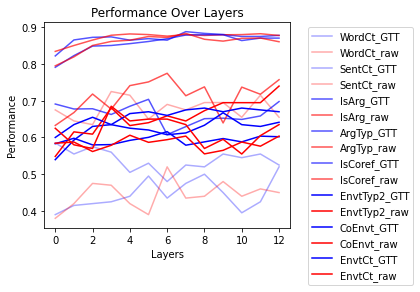

In [648]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Extract layer number and type (GTT or raw) from the New_Index column
df['Layer'] = df['New_Index'].apply(lambda x: int(re.search(r'layer_(\d+)', x).group(1)))
df['Type'] = df['New_Index'].apply(lambda x: 'GTT' if 'GTT' in x else 'raw')

# Sort the dataframe by Layer and Type
df.sort_values(['Type', 'Layer'], inplace=True)

# Define plot settings
colors = {'GTT': 'blue', 'raw': 'red'}
opacities = {'WordCt': 0.33, 'SentCt': 0.33, 'IsArg': 0.67, 'ArgTyp': 0.67, 'IsCoref': 0.67,
             'EnvtTyp2': 1, 'CoEnvt': 1, 'EnvtCt': 1}

# Loop over performance types
for col in ['WordCt', 'SentCt', 'IsArg', 'ArgTyp', 'IsCoref', 'EnvtTyp2', 'CoEnvt', 'EnvtCt']:
    for t in ['GTT', 'raw']:
        subset = df[df['Type'] == t]
        plt.plot(subset['Layer'], subset[col], color=colors[t], alpha=opacities[col], label=f'{col}_{t}')

plt.xlabel('Layers')
plt.ylabel('Performance')
plt.title('Performance Over Layers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.tight_layout()
plt.savefig('performance_over_layers.png', dpi=300)
plt.savefig('performance_over_layers.eps', format='eps')

plt.show()


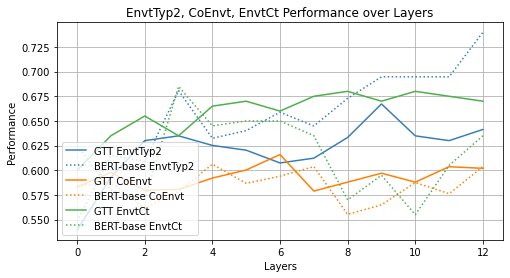

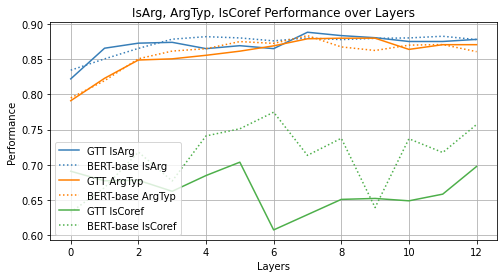

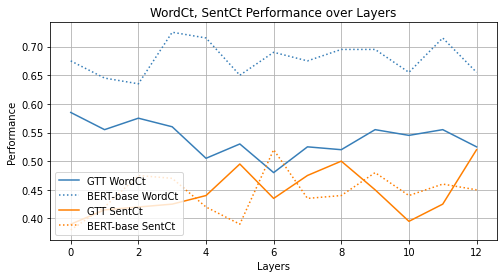

In [655]:
import pandas as pd
import matplotlib.pyplot as plt


# Separate data into GTT and raw
df_gtt = df[df['New_Index'].str.contains("GTT")]
df_raw = df[df['New_Index'].str.contains("raw")]

# Define layers
layers = [i for i in range(13)]

# Define the sets of variables to plot
variables = [['EnvtTyp2', 'CoEnvt', 'EnvtCt'], ['IsArg', 'ArgTyp', 'IsCoref'], ['WordCt', 'SentCt']]

# Define the line styles
line_styles = ['-', ':', '--']
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Loop over the sets of variables
for i, var_set in enumerate(variables):
    plt.figure(figsize=(8, 4))

    for j, var in enumerate(var_set):
        plt.plot(layers, df_gtt[var], color=colors[j], linestyle=line_styles[0], label='GTT ' + var)
        plt.plot(layers, df_raw[var], color=colors[j], linestyle=line_styles[1], label='BERT-base ' + var)

    plt.legend(loc='lower left')
    plt.xlabel('Layers')
    plt.ylabel('Performance')
    plt.title(', '.join(var_set) + ' Performance over Layers')
    plt.grid(True)
    plt.savefig(f'graph{i+1}.pdf',bbox_inches='tight')
    plt.show()


In [650]:
next(results.values().__iter__()).keys()

dict_keys(['XY_bool_CoEnv', 'XY_bool_coref', 'Y_bucket_num_sent_muc1700', 'XY_bool_isArg', 'Y_bucket_num_words_muc1700', 'Y_bucket_num_events_muc1700', 'XY_6way_typing', 'XY_5way_rolelabeling'])

In [ ]:
display_dict